<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Sex Prediction With Linear Regression

# 1. Introduction to the problem

  Abalone is a kind of snail that lives in the ocean. It is famous for its delicious taste and rich nutrition. It is an indispensable delicacy in the seafood combo and there is a huge demand for abalone in the market. For the sustainable development of abalone, it is an important task to quickly distinguish the sex and maturity of abalone. Fishing for juveniles is not sustainable, and the nutritional value of female abalone is higher than that of males.

  So in the reasearch project, I set up a linear regression model to distinguish the sex of abalone.


# 2. Related work

  The Dataset Abalone, posted on UC Irvine Machine Learning Repository in 1995, is a tabular dataset including values of abalones in many different perspectives such as sex, length, diameter, etc. The auther pointed out this dataset could be used to make a module to approximate the age of abalone which could be inveatigated by counting the rings of the abalone, which is a lengthy process. There are already many people have done this project and estabilished multiple models.

  As the demand for abalone is high, people tend to focus on if the abalone fishing is sustainable, in this case, if we are leaving enough infant for recultivation and the if the male-female ratio is within a reasonable range. An artical published Hshan.T had done some related research by modeling with R language, it shown that the model is accurate when identifying the infant but not other two sex(male, female). Thus the goal of this project is trying to get a more accurate result of distinguish the male and female.


# 3. Experiment setups

  The dataset used in this project is from the dataset Abalone from UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/1/abalone). The data base contains 4177 instances and 8 features with no missing values. The data set suggested setting up a model to estimulate the age (ring number) of ablones. Since many people have already done it, this project is studying the sex of ablones.

  For the experiment setup, I want to first sort data using pandas, then visualizing graphs to identify which factors might be usful to estimulate the sex of the Ablone. In the step of sorting the data, I want to make sure there are enough groups of experimental subject of each group. Since the factor sex is discrete, we assign it a value to make it visible on graphs later. (With assigning Male = 0, Female = 1, Infant = 2)


  After defined useful data, I will create a linear regression model using it. The first step is to split the data into testing groups and training groups. Train the model with the training group and test the model using testing group, give the prediction of the testing group and compare it with the actural data listed in the dataset. Last, calculate the error too see if the model is accurate.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url = 'https://raw.githubusercontent.com/xinyang4O4/MAT421/refs/heads/main/abalone.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weigtht,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,1528
I,1342
F,1307


In [ ]:
df['Sex'] = df['Sex'].map({'M':0,'F':1,'I':2})

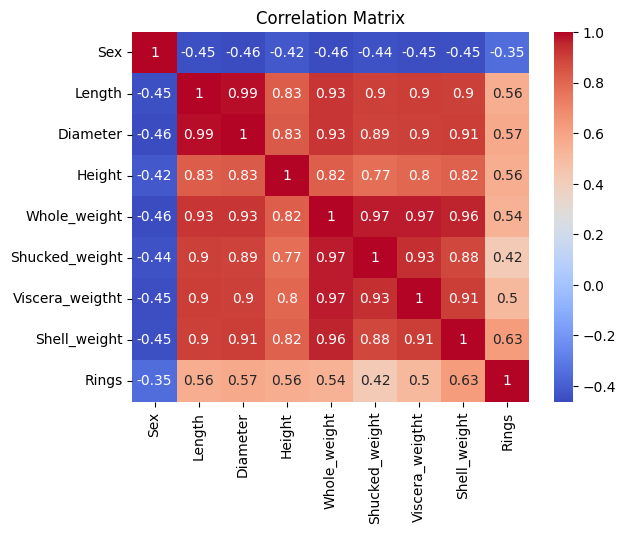

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the coolwarm correlation matrix, we can see that the correlation of all factors with sex is low. In this case, I want to try to use multiple linear regression (discussed in later parts) to see if considering multiple factors, will the error of estimulation be less.

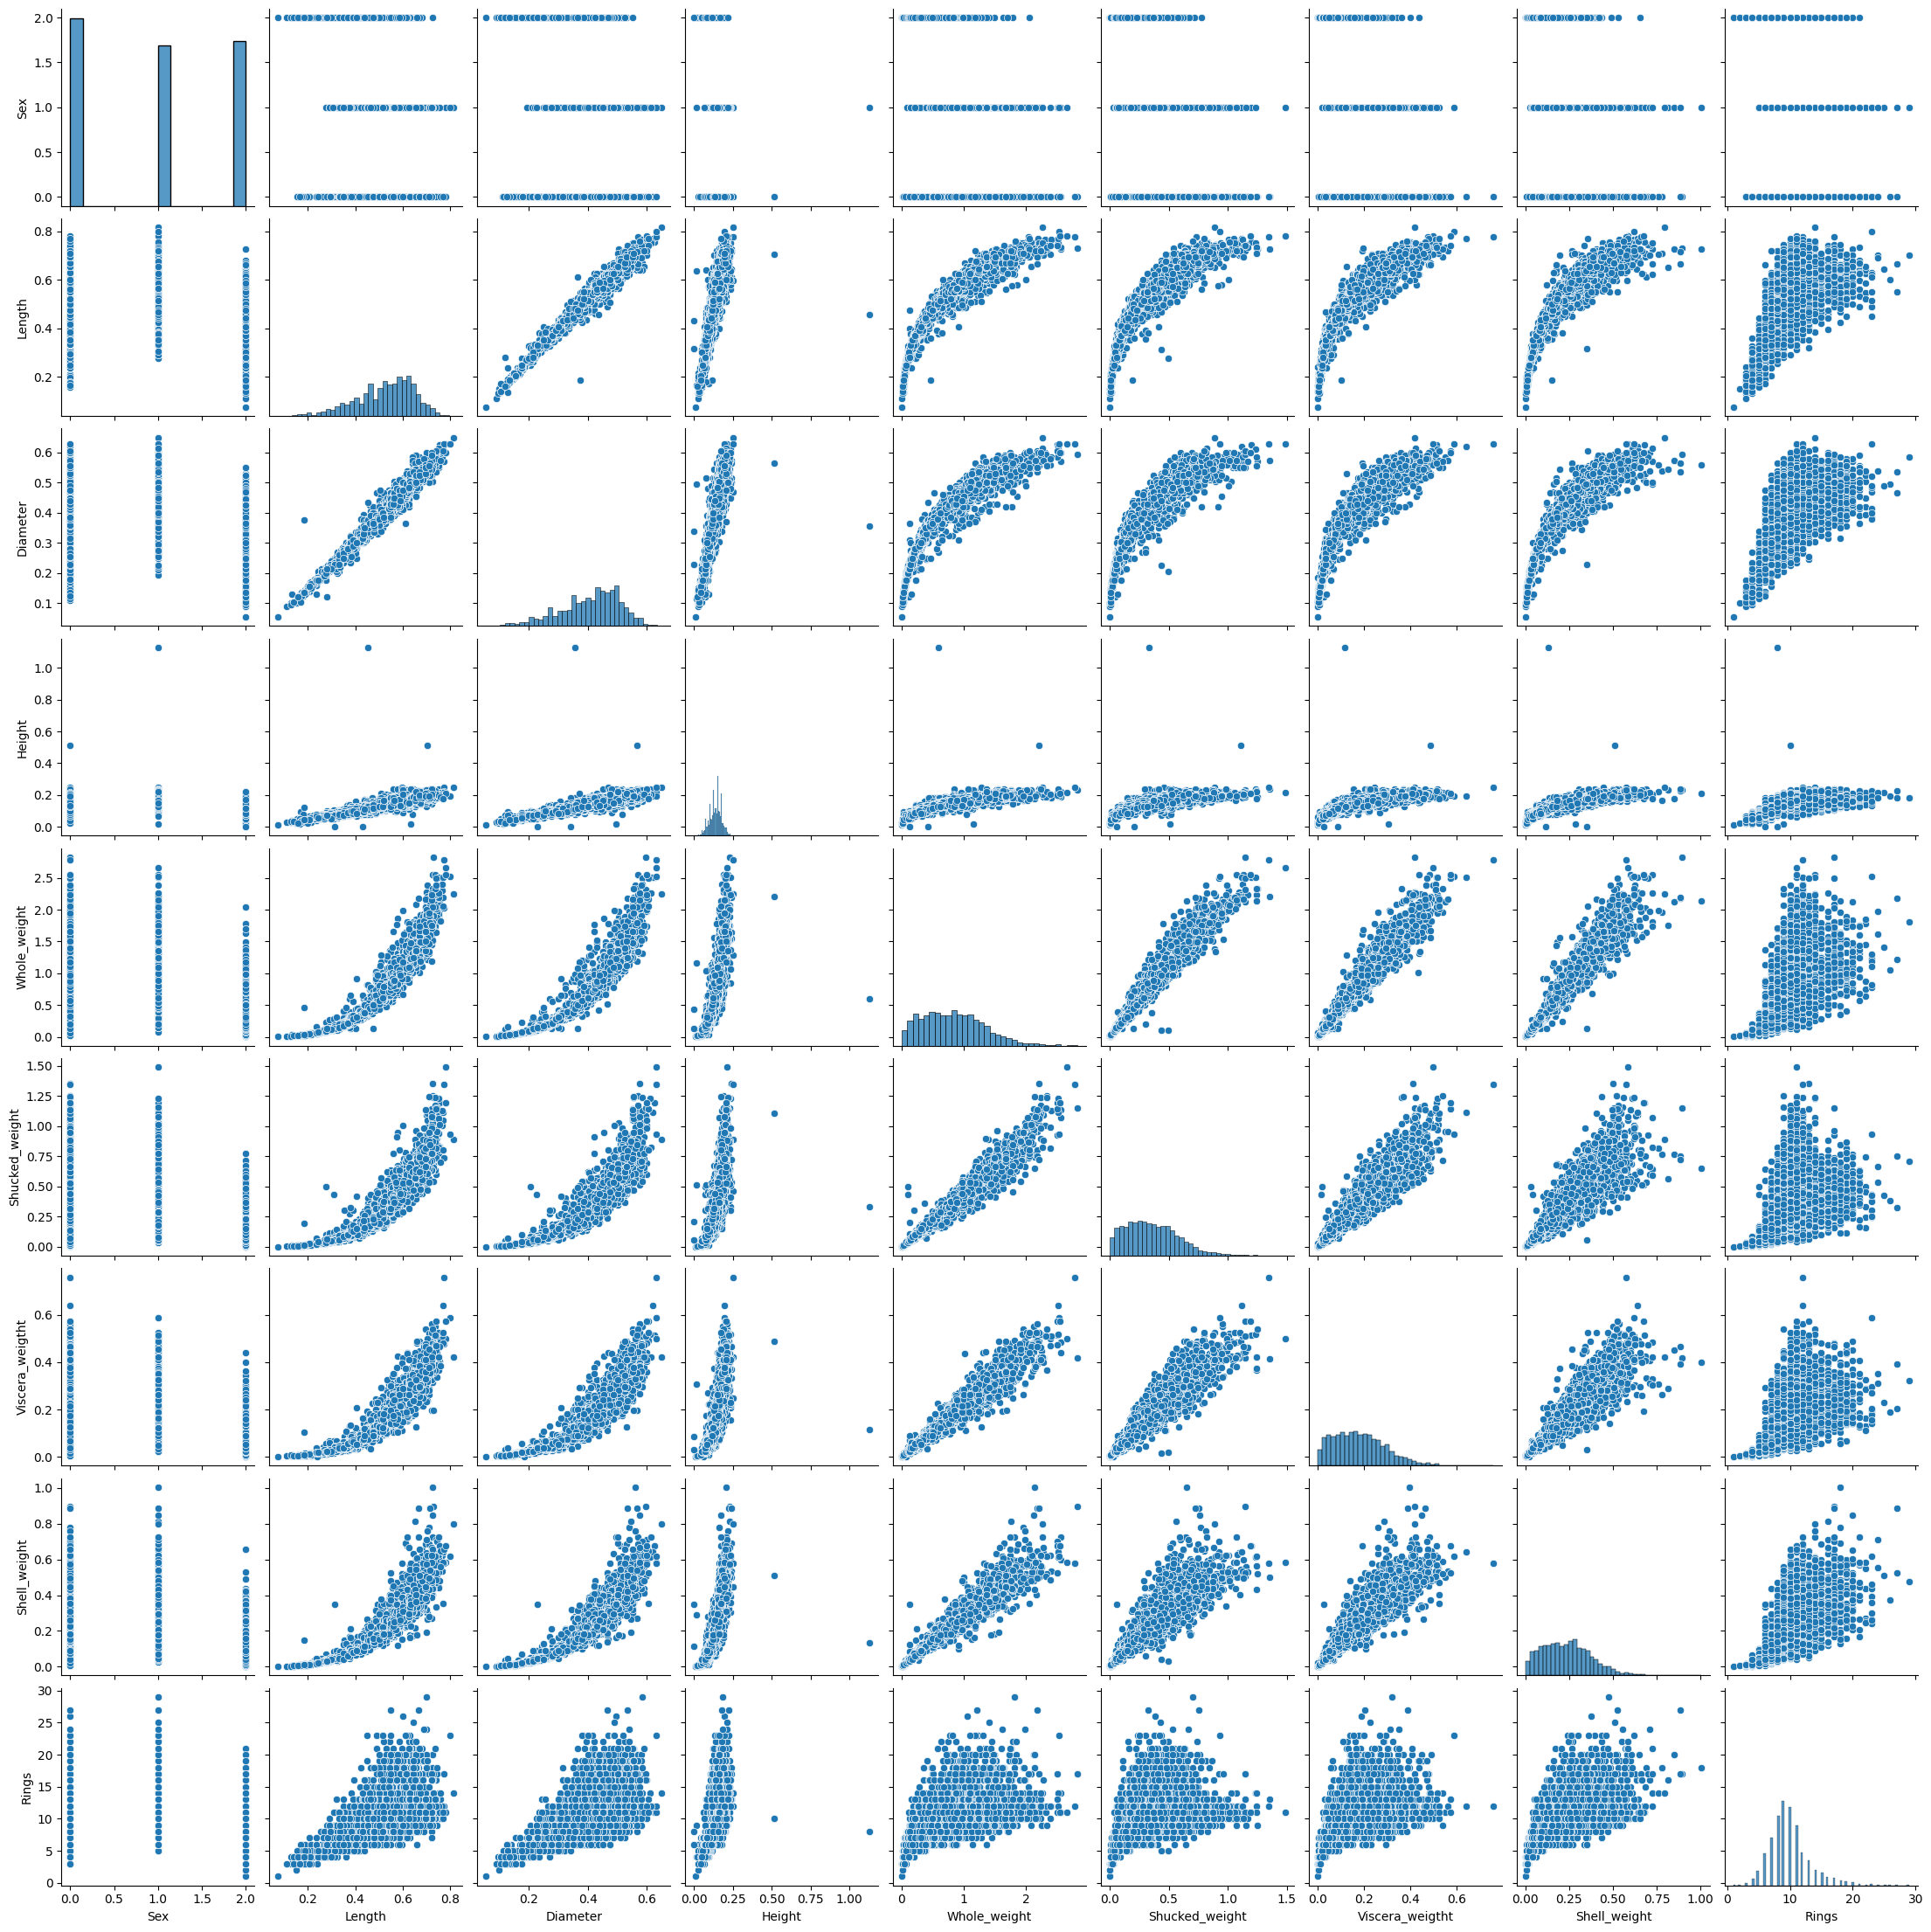

In [ ]:
sns.pairplot(df)

From examing the first column of the graph, we can see that the data generally froms two kinds of distribution, one base off of volumn and the other base off of weight, with age (Rings) be the exceptional factor.

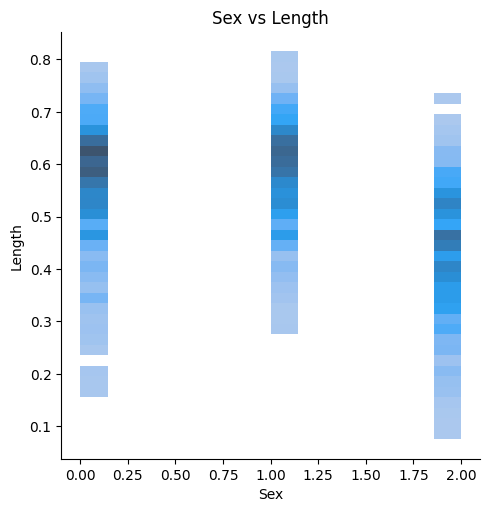

In [ ]:
sns.displot(data=df,x='Sex',y='Length')
plt.title("Sex vs Length")
plt.show()

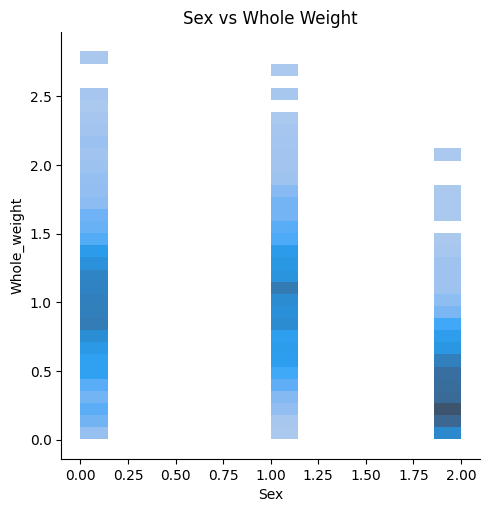

In [ ]:
sns.displot(data=df,x='Sex',y='Whole_weight')
plt.title("Sex vs Whole Weight")
plt.show()

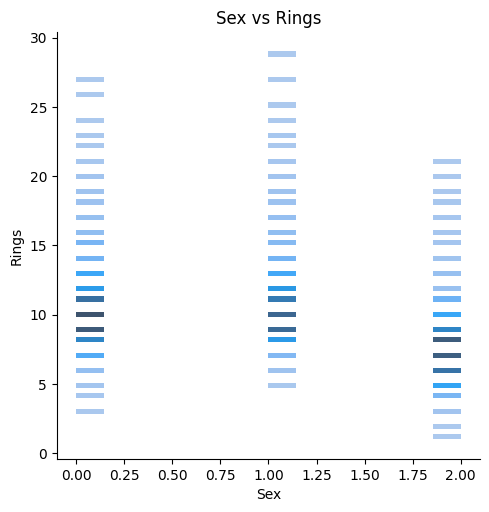

In [ ]:
sns.displot(data=df,x='Sex',y='Rings')
plt.title("Sex vs Rings")
plt.show()

Through looking at closer graphs, the three  most obvious features are Length, Whole Weight and Rings. However, the concentration of age of each sex is very simular, then, we are not conserdering it while making the model.

# 4. Proposed methodology/ models

  In this project, I'm planing to use Linear Regression model coded by python. Specifically, the Simple Linear Regression model.


Linear regression is a model that estimates the relationship between a scalar response and one or more explanatory variables. A model with one explanatory variable is a simple linear regression; a model with two or more explanatory variables is a multiple linear regression. (Wikipedia, n.d.) In one word, we are trying to predict values, by setting up a model.

For the project, I'm setting up a multiple linear regression model which seeks to find relationship between several variables.

In this case, I split the dataset in to two groups: the tranining group and the testing group. For the training group, I am expecting a relative low R2 score, and for the testing group, the R2 score should grow larger.

In [ ]:
from sklearn.model_selection import train_test_split

target_df = df[['Height', 'Whole_weight']]

X_train,X_test,y_train,y_test = train_test_split(df[['Sex']],target_df, test_size=0.01, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135, 1)
(4135, 2)
(42, 1)
(42, 2)


# 5. Expected results

  The expected result would be at least 80% correct on the sex with the Mean Squared error of testing model is less than 5 and The R2 score of testing is less than 0.7, or the testing score is in the range of the training score plus or minus 0.5 and 0.05.

# 6. Comparison


In [ ]:
from sklearn.metrics import r2_score

print ("R2 Score value (train): {:.4f}".format(lm.score(X_train, y_train)))
print ("R2 Score value (test): {:.4f}".format(lm.score(X_test, y_test)))

R2 Score value (train): 0.1929
R2 Score value (test): 0.2850


# 7. Conclusion

# 8. Discussion

From investigating the dataset, something weird happened, which age (Ring) of infants has many overlaps with the male, female sets. But by defination of infants, they should be younger than other two factors, at least the average should be smaller, but that didn't happen which is weird. So this might not be the best database to work on.

# Resources:

  Hshan.T. (2022b, March 30). Abalone Sustainability and Profitability — Sex Classification and Weights Prediction via Physical Measurements on R | by Hshan.T | Feb, 2021 | Medium | The Startup. Medium. https://medium.com/swlh/abalone-sex-classification-via-physical-measurements-r-3b72526d5326

  Kong, Q., Siauw, T., & Bayen, A. (2020). Python programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press.

  UCI Machine Learning Repository. (n.d.-b). https://archive.ics.uci.edu/dataset/1/abalone

  Wikipedia contributors. (2025, April 8). Linear regression. Wikipedia. https://en.wikipedia.org/wiki/Linear_regression